In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (12,8)
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay


In [52]:
initial_dataset = pd.read_csv('/content/drive/MyDrive/type_two_diabetes_prediction/diabetes_two.csv')
initial_dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [53]:
initial_dataset.info()
print("---------------------")
"Dataset Shape:" ,initial_dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              519 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            519 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

('Dataset Shape:', (520, 17))

In [54]:
initial_dataset.isnull().sum()


Age                   1
Gender                1
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              1
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

<Axes: >

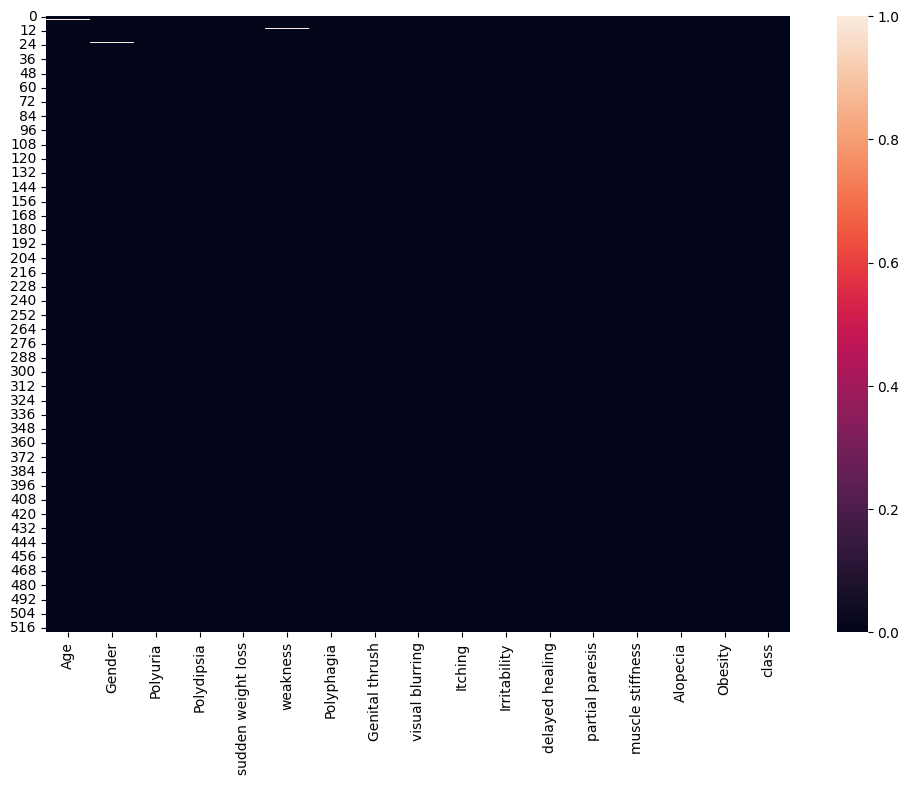

In [55]:

plt.figure(figsize=(12,8))
sns.heatmap(initial_dataset.isnull()) #white lines are null values

In [56]:
initial_dataset.describe()

,Age
count,519.000000
mean,49.082852
std,27.104027
min,16.000000
25%,39.000000
50%,48.000000
75%,57.000000
max,600.000000


Gender
Male      327
Female    192
Name: count, dtype: int64


<Axes: xlabel='Gender'>

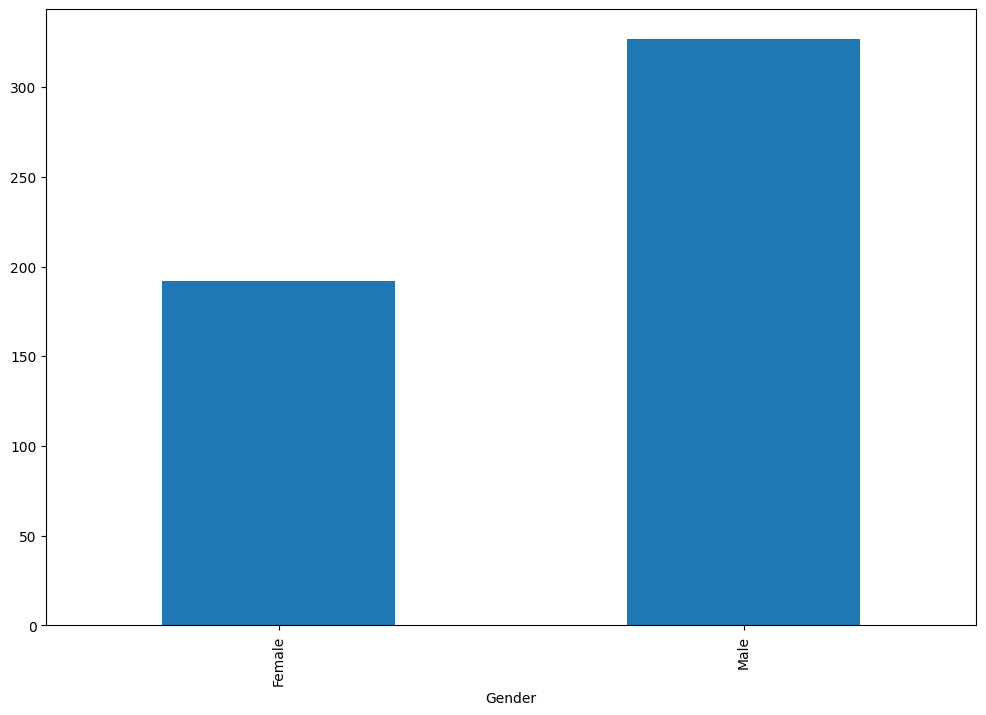

In [57]:
print(initial_dataset["Gender"].value_counts())
initial_dataset.groupby('Gender').size().plot(kind='bar', label="Type")

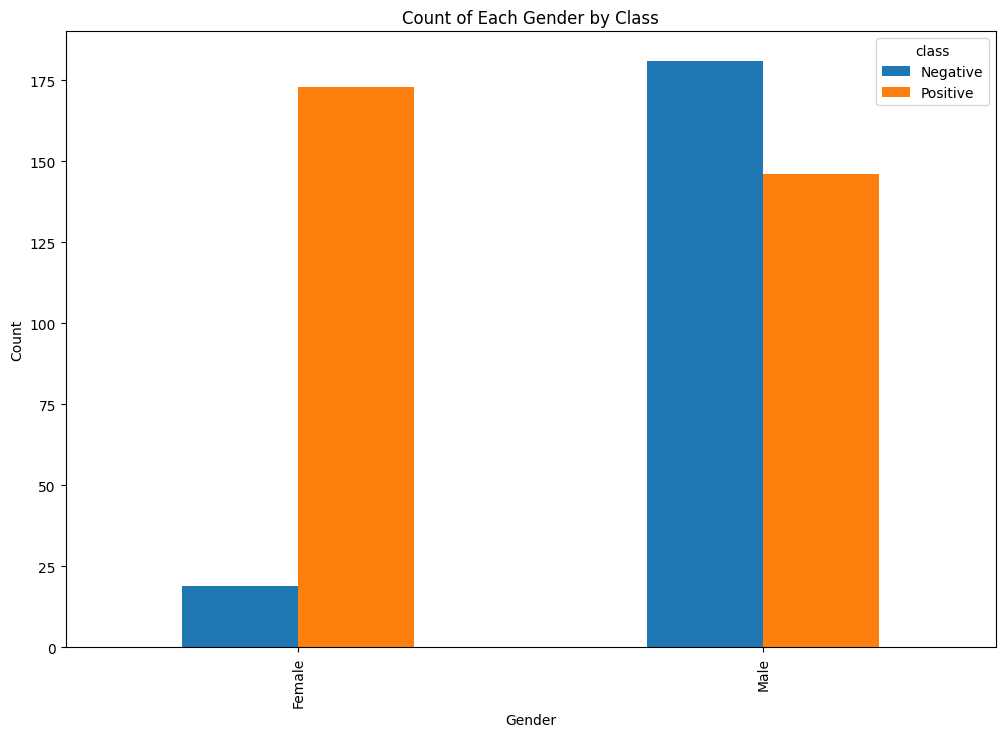

In [58]:
import matplotlib.pyplot as plt

# Assuming 'initial_dataset' is your DataFrame
grouped_data = initial_dataset.groupby(['Gender', 'class']).size().unstack()

# Plotting
grouped_data.plot(kind='bar')

# Adding labels
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Each Gender by Class')

# Show the plot
plt.show()



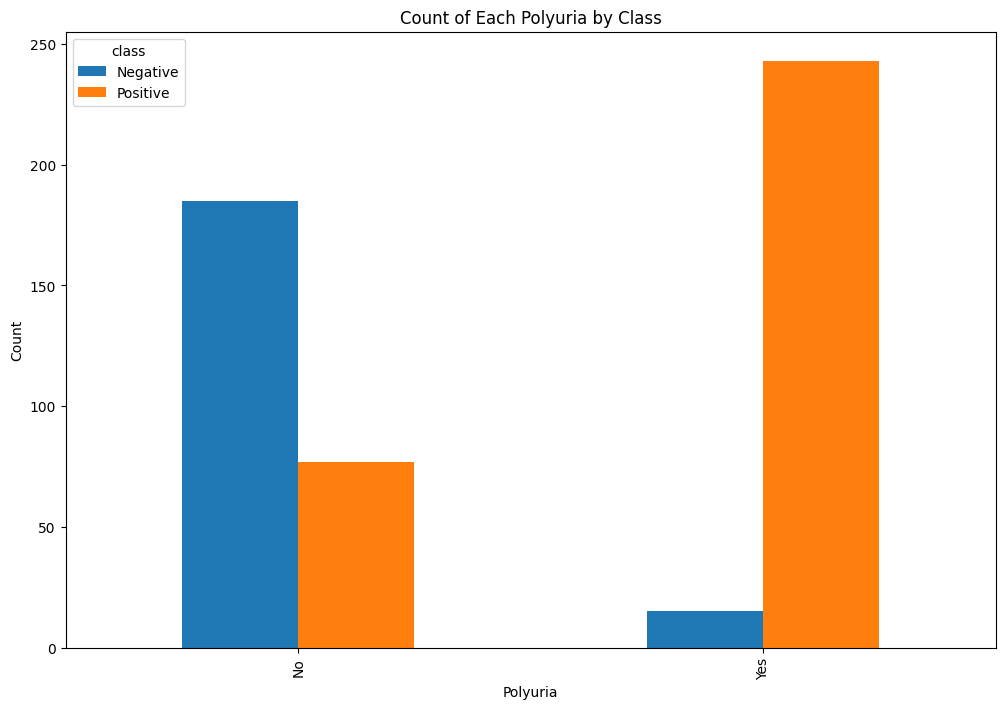

In [59]:
import matplotlib.pyplot as plt

# Assuming 'initial_dataset' is your DataFrame
grouped_data = initial_dataset.groupby(['Polyuria', 'class']).size().unstack()

# Plotting
grouped_data.plot(kind='bar')

# Adding labels
plt.xlabel('Polyuria')
plt.ylabel('Count')
plt.title('Count of Each Polyuria by Class')

# Show the plot
plt.show()

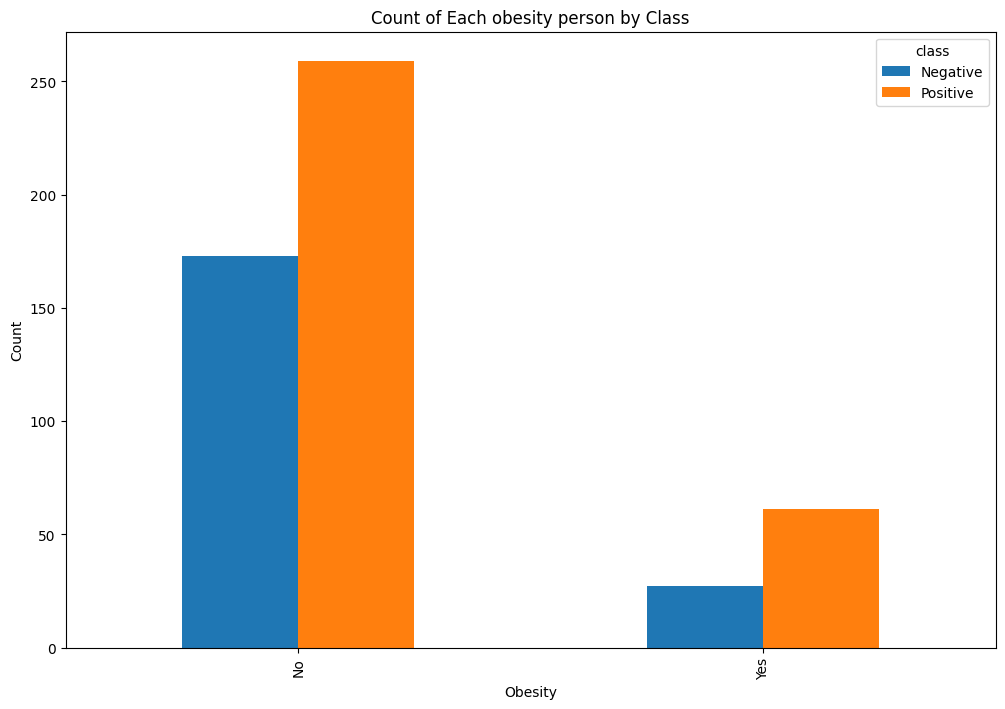

In [60]:
import matplotlib.pyplot as plt

# Assuming 'initial_dataset' is your DataFrame
grouped_data = initial_dataset.groupby(['Obesity', 'class']).size().unstack()

# Plotting
grouped_data.plot(kind='bar')

# Adding labels
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.title('Count of Each obesity person by Class')

# Show the plot
plt.show()

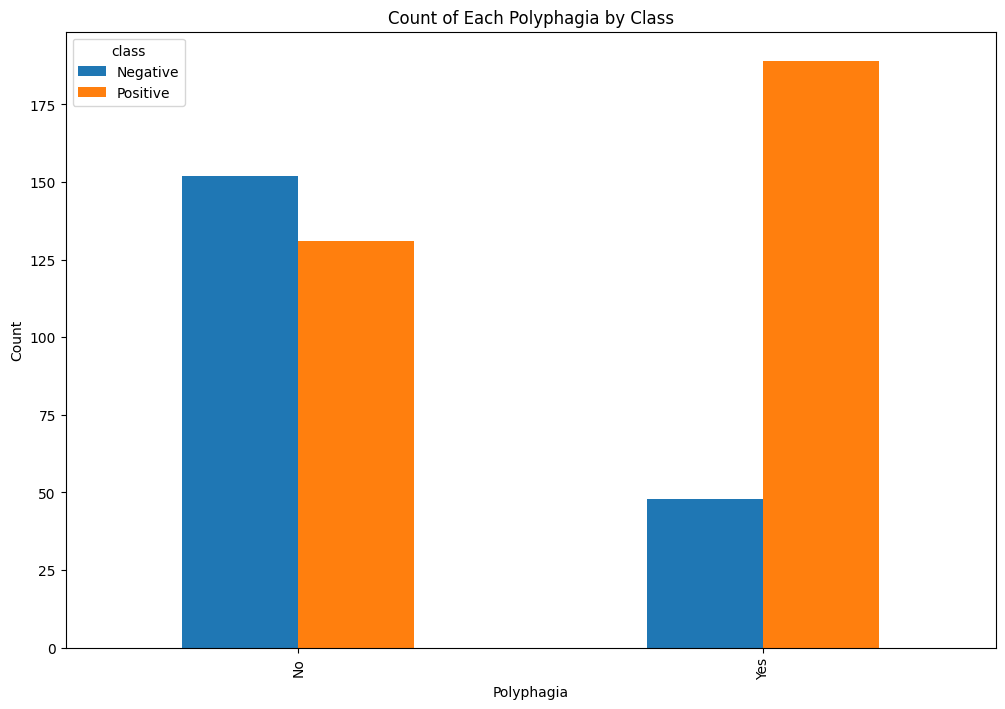

In [61]:
import matplotlib.pyplot as plt

# Assuming 'initial_dataset' is your DataFrame
grouped_data = initial_dataset.groupby(['Polyphagia', 'class']).size().unstack()

# Plotting
grouped_data.plot(kind='bar')

# Adding labels
plt.xlabel('Polyphagia')
plt.ylabel('Count')
plt.title('Count of Each Polyphagia by Class')

# Show the plot
plt.show()

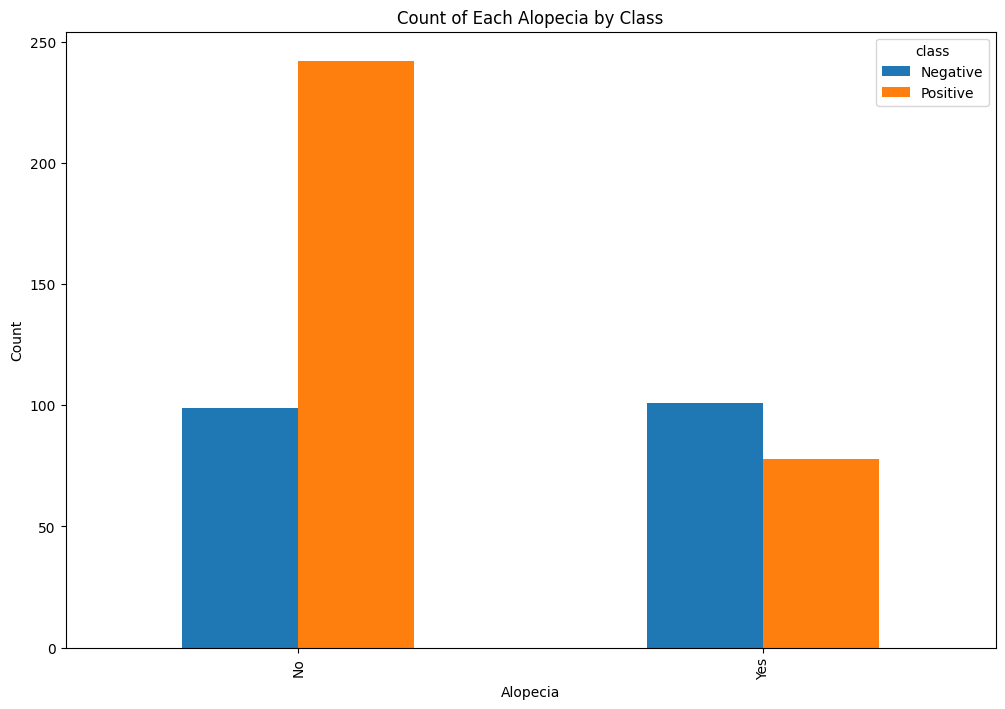

In [62]:
import matplotlib.pyplot as plt

# Assuming 'initial_dataset' is your DataFrame
grouped_data = initial_dataset.groupby(['Alopecia', 'class']).size().unstack()

# Plotting
grouped_data.plot(kind='bar')

# Adding labels
plt.xlabel('Alopecia')
plt.ylabel('Count')
plt.title('Count of Each Alopecia by Class')

# Show the plot
plt.show()

In [63]:
import plotly.express as px
agehist= px.histogram(initial_dataset, x='Age', color="class", title="Distribution of Postive cases with Ages")
agehist.show()



In [64]:
genbox = px.box(initial_dataset, y="Age", x="class", color="Gender", points="all", title= "Age Vs Positive/Negative")
genbox.show()

In [65]:
clspi = px.pie(initial_dataset, values='Age', names='class', title= "Ratio of Positive and Negative cases")
clspi.show()

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pltbl = ['Gender', 'class']
cm = plt.cm.get_cmap('Greens')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab


class,Negative,Positive
Gender,,
Female,9.500000,54.230000
Male,90.500000,45.770000


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pltbl = ['Age', 'class']
cm = plt.cm.get_cmap('Greens')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab

class,Negative,Positive
Age,,
16.000000,0.000000,0.310000
25.000000,0.000000,0.630000
26.000000,0.500000,0.000000
27.000000,3.000000,0.000000
28.000000,2.000000,1.570000
29.000000,0.500000,0.000000
30.000000,9.000000,2.190000
31.000000,0.000000,0.940000
32.000000,1.000000,0.940000


In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pltbl = ['Polyuria', 'class']
cm = plt.cm.get_cmap('Greens')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pltbl = ['sudden weight loss', 'class']
cm = plt.cm.get_cmap('Greens')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pltbl = ['Polyphagia', 'class']
cm = plt.cm.get_cmap('Greens')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pltbl = ['Genital thrush', 'class']
cm = plt.cm.get_cmap('Greens')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pltbl = ['Itching', 'class']
cm = plt.cm.get_cmap('Greens')  # Get the colormap from Matplotlib
crosstab_data = pd.crosstab(initial_dataset[pltbl[0]], initial_dataset[pltbl[1]], normalize='columns') * 100
styled_crosstab = (round(crosstab_data, 2)).style.background_gradient(cmap=cm)

# Display the styled dataframe
styled_crosstab



class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


In [73]:
from sklearn import preprocessing
doing_preprocessing = preprocessing.LabelEncoder()

In [74]:
dataset =initial_dataset.copy()   # Duplicating the Dataset because i need to convert catagorical values to numeric values
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [75]:
for i in dataset:
    dataset[i] = doing_preprocessing.fit_transform(dataset[i])
dataset.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,52,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,51,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,31,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,33,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,42,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,43,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,46,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


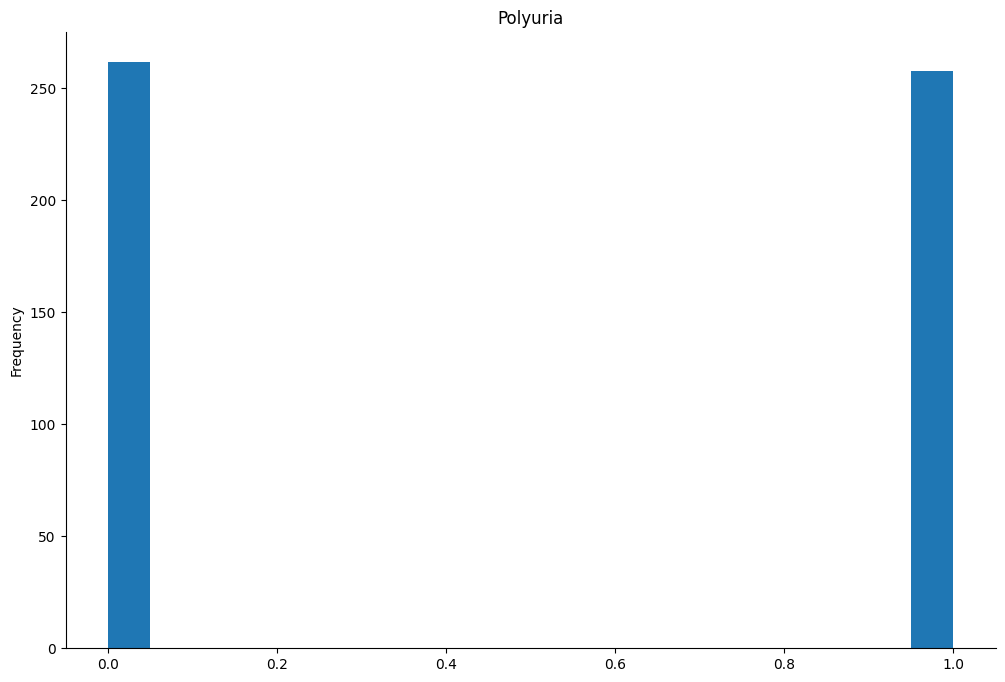

In [76]:

from matplotlib import pyplot as plt
dataset['Polyuria'].plot(kind='hist', bins=20, title='Polyuria')
plt.gca().spines[['top', 'right',]].set_visible(False)

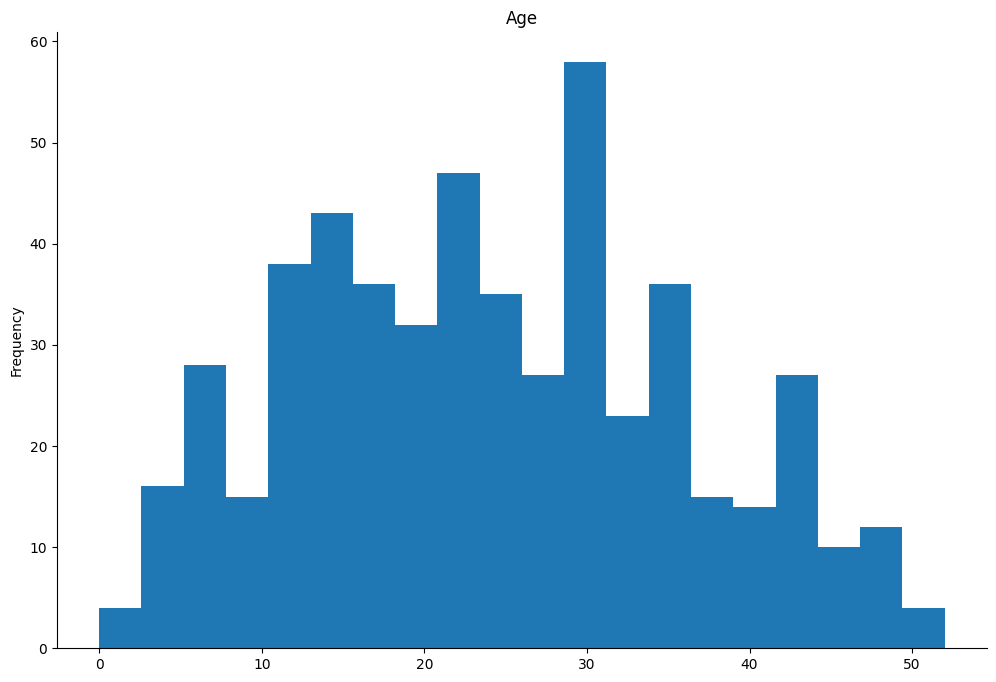

In [77]:

from matplotlib import pyplot as plt
dataset['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

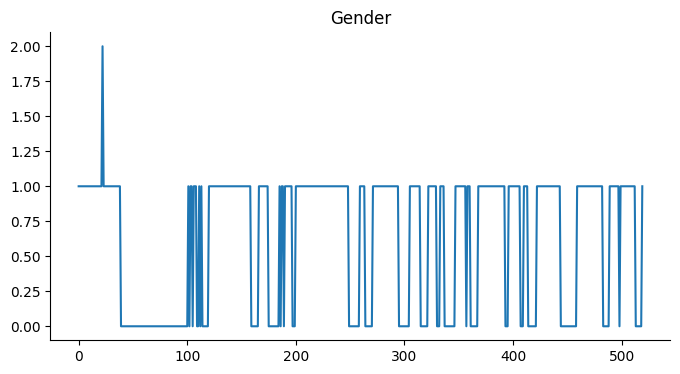

In [78]:

from matplotlib import pyplot as plt
dataset['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

In [79]:

corr=dataset.corr()
corr

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.069898,0.215337,0.127111,0.054488,0.235356,0.331204,0.075530,0.398919,0.299497,0.210090,0.271401,0.232520,0.311926,0.334243,0.151395,0.111864
Gender,0.069898,1.000000,-0.262999,-0.313612,-0.275166,-0.124471,-0.222029,0.214863,-0.210181,-0.048060,-0.006641,-0.104903,-0.333373,-0.092964,0.331007,-0.007143,-0.442919
Polyuria,0.215337,-0.262999,1.000000,0.598609,0.447207,0.265025,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.127111,-0.313612,0.598609,1.000000,0.405965,0.334376,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.054488,-0.275166,0.447207,0.405965,1.000000,0.277578,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.235356,-0.124471,0.265025,0.334376,0.277578,1.000000,0.175427,0.034817,0.295394,0.303451,0.152503,0.337309,0.267655,0.266285,0.095194,0.043588,0.244598
Polyphagia,0.331204,-0.222029,0.373873,0.316839,0.243511,0.175427,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.075530,0.214863,0.087273,0.028081,0.089858,0.034817,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.398919,-0.210181,0.235095,0.331250,0.068754,0.295394,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.299497,-0.048060,0.088289,0.128716,-0.004516,0.303451,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


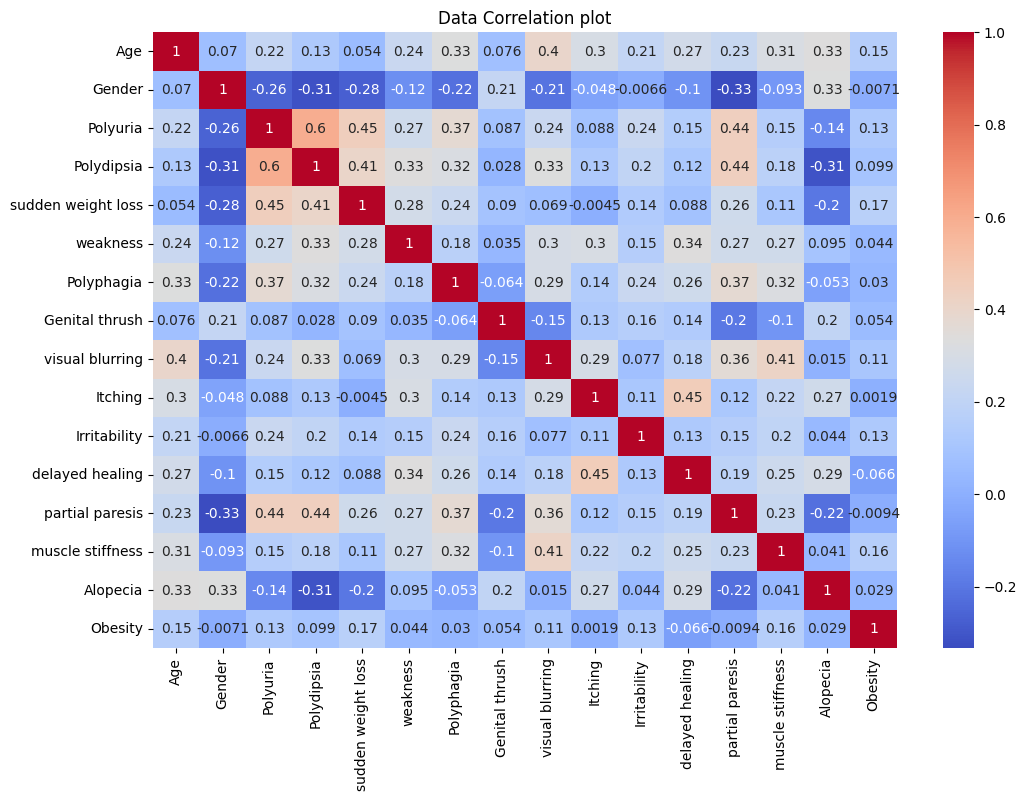

In [80]:
keep_features =dataset.drop(initial_dataset.columns[-1],axis=1)
fig = plt.figure(figsize=(12, 8))
corr_plot = sns.heatmap(keep_features.corr(),annot = True, cmap = 'coolwarm' )
plt.title("Data Correlation plot")
plt.show()

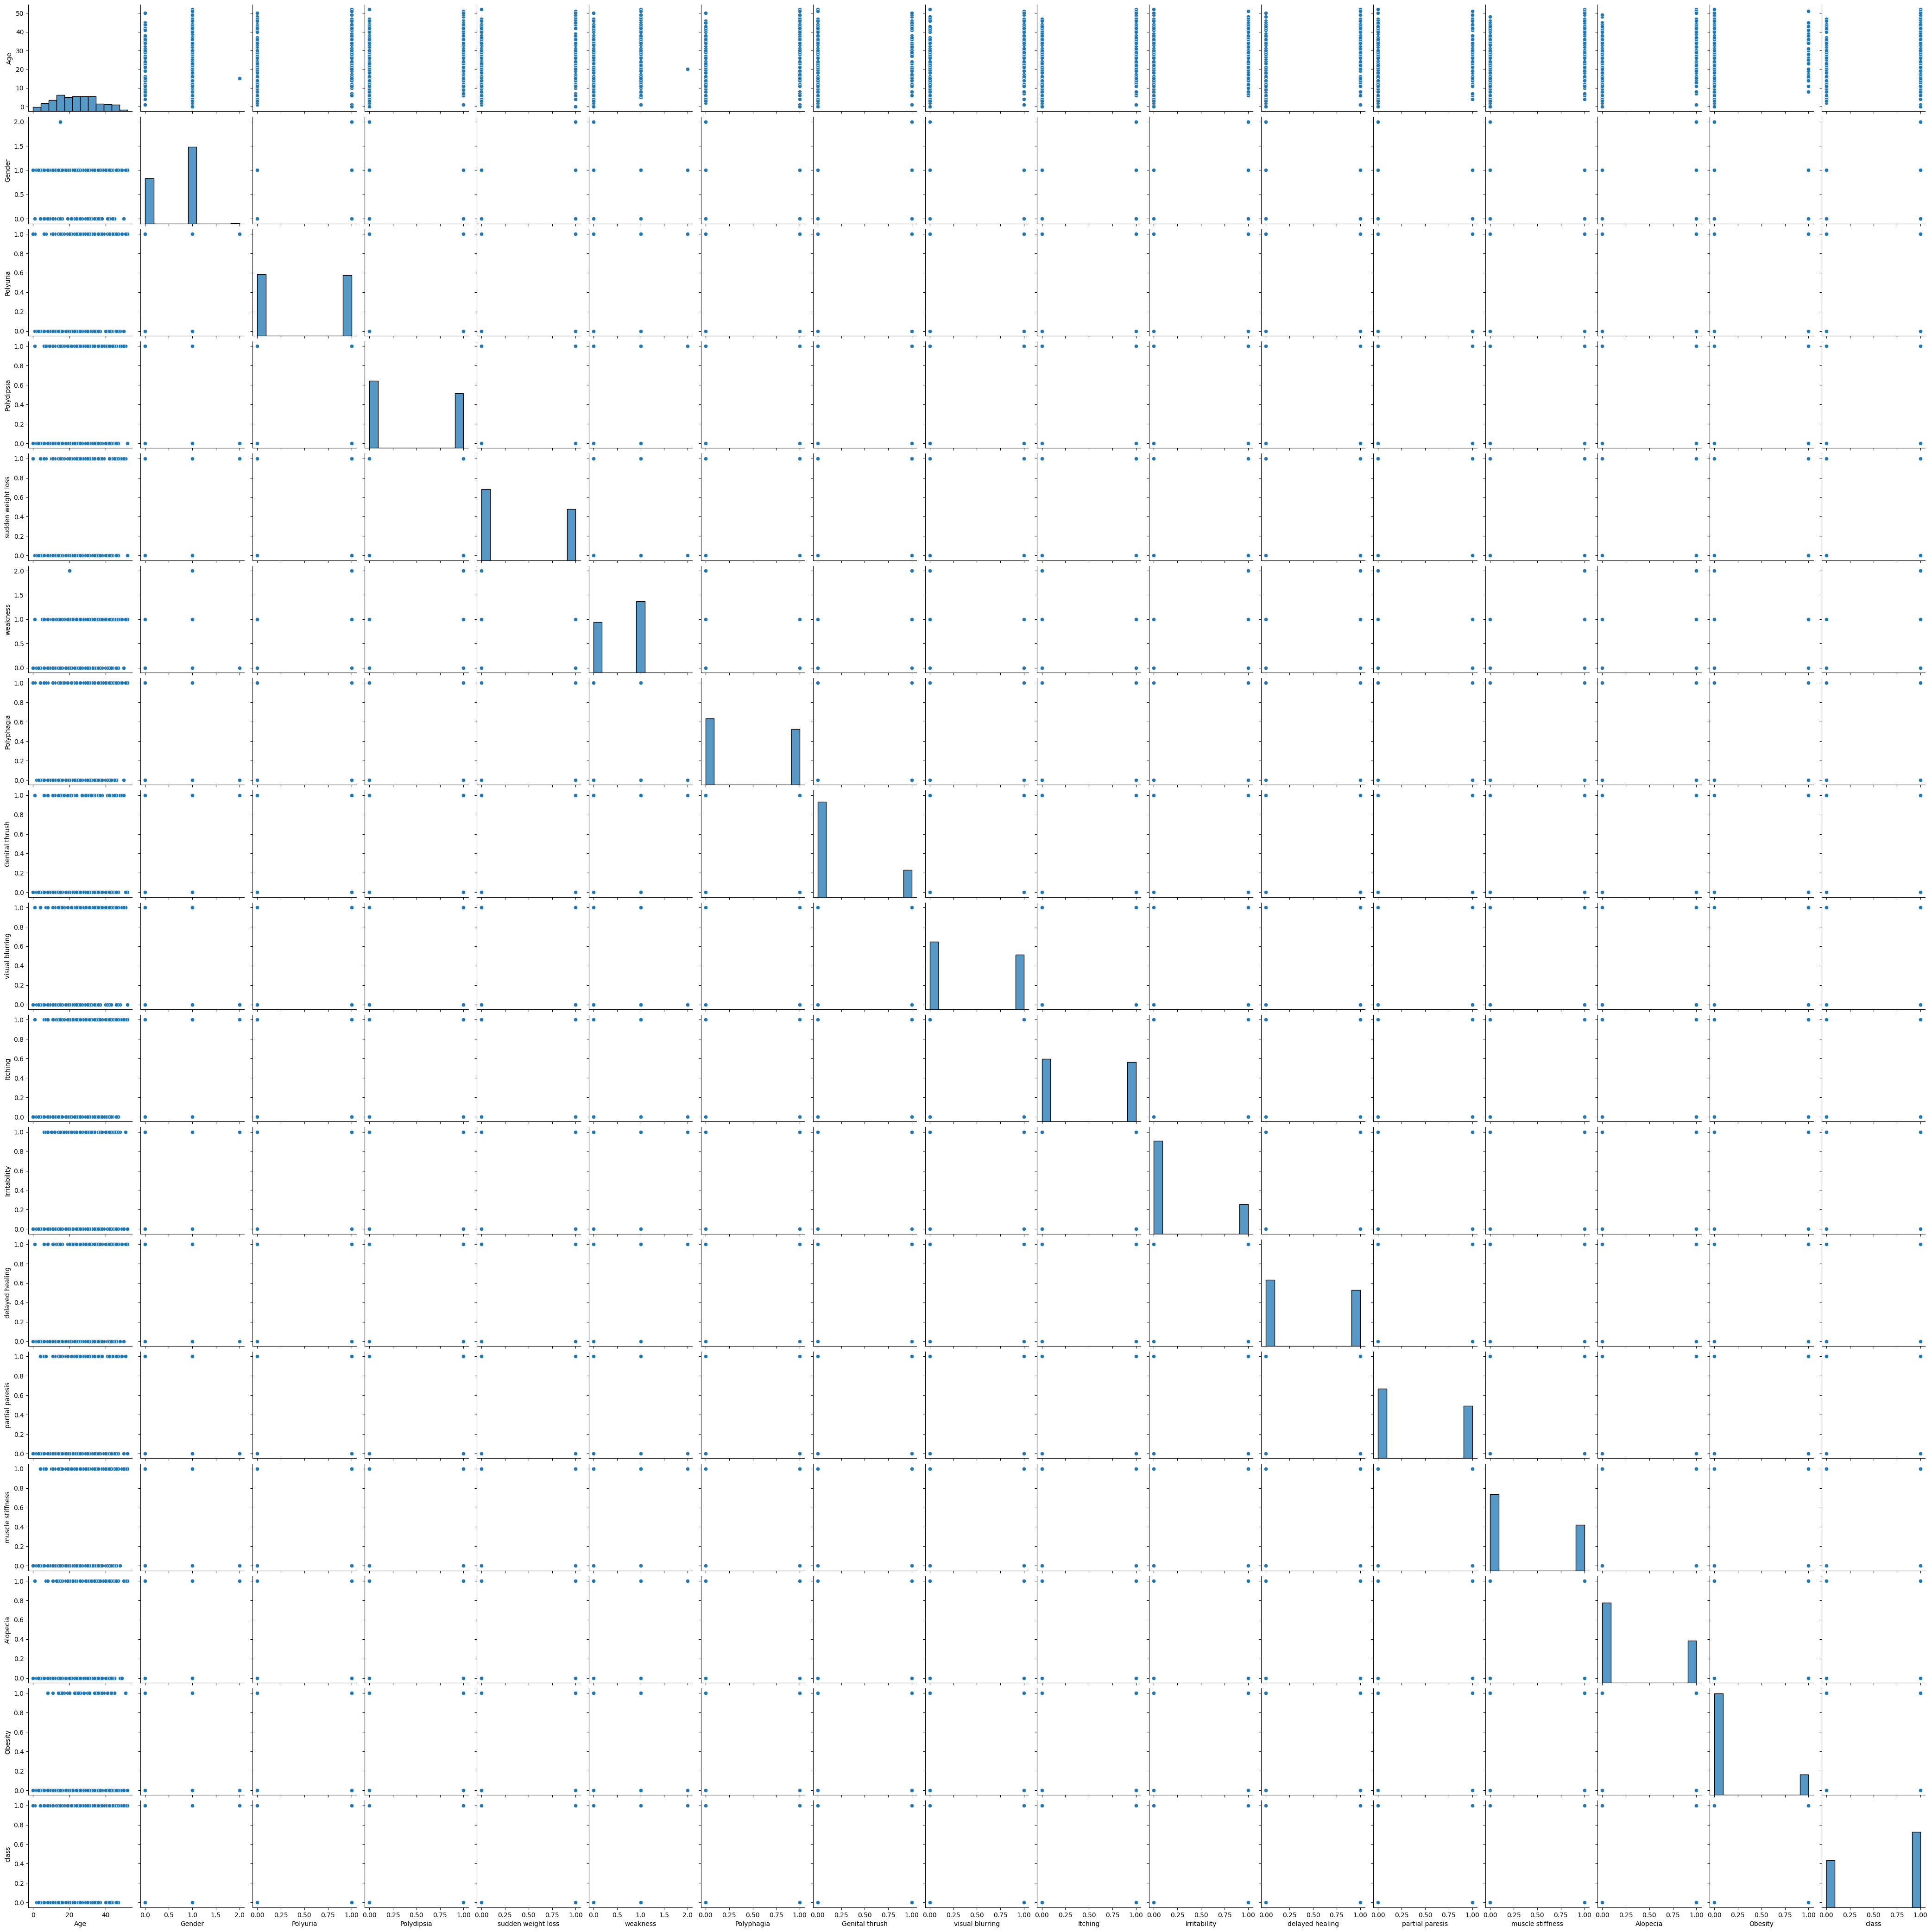

In [81]:
sns.pairplot(dataset)

In [82]:
from sklearn.model_selection import train_test_split
x = dataset.drop(['class'], axis = 1)
y = dataset[['class']]
x.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,52,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,51,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [83]:
#Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x)
# transform data
x = scaler.transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(520, 16) (364, 16) (156, 16)


In [84]:
print("per-feature minimum after scaling:\n {}".format(
    x_train.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    x_train.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [0.98076923 0.5        1.         1.         1.         0.5
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


Accuracy: 0.9551282051282052
F1: 0.9651741293532337
Precision: 0.9797979797979798
Recall: 0.9509803921568627


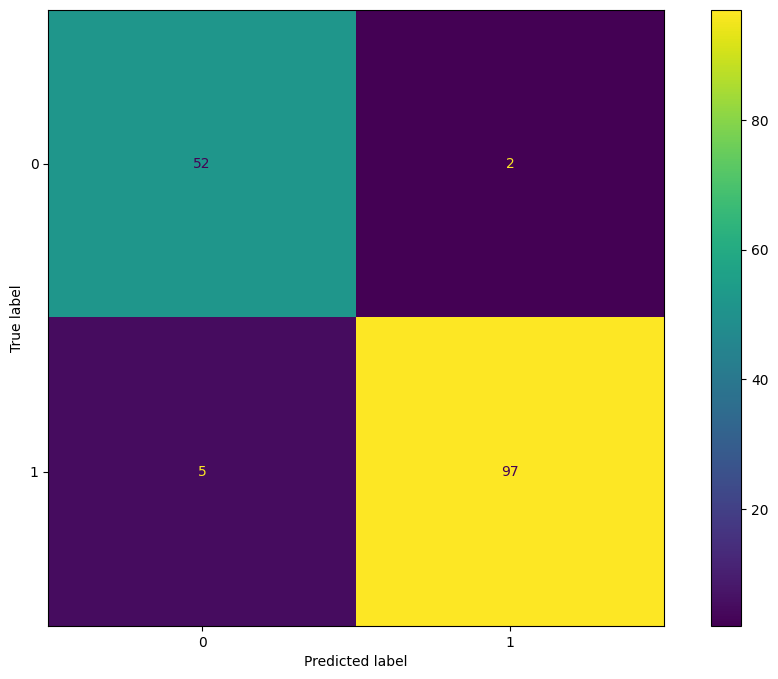

In [85]:
from sklearn import svm
# Create an SVM classifier
svm_classifier = svm.SVC()
svm_classifier.fit(x_train, y_train)

# Make predictions using the SVM classifier
y_pred_svm = svm_classifier.predict(x_test)

# Calculate accuracy
accuracySVM = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracySVM)
F1_score_svm=f1_score(y_test,y_pred_svm)
print("F1:", F1_score_svm)
# Calculate precision
precisionSVM = precision_score(y_test, y_pred_svm)
print('Precision:', precisionSVM)

# Calculate recall
recallSVM = recall_score(y_test, y_pred_svm)
print('Recall:', recallSVM)

# Create a confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_classifier.classes_)

# Display confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_classifier.classes_)
disp_svm.plot()
plt.show()



Accuracy: 0.967948717948718
F1: 0.9753694581280787
Precision: 0.9801980198019802
Recall: 0.9705882352941176


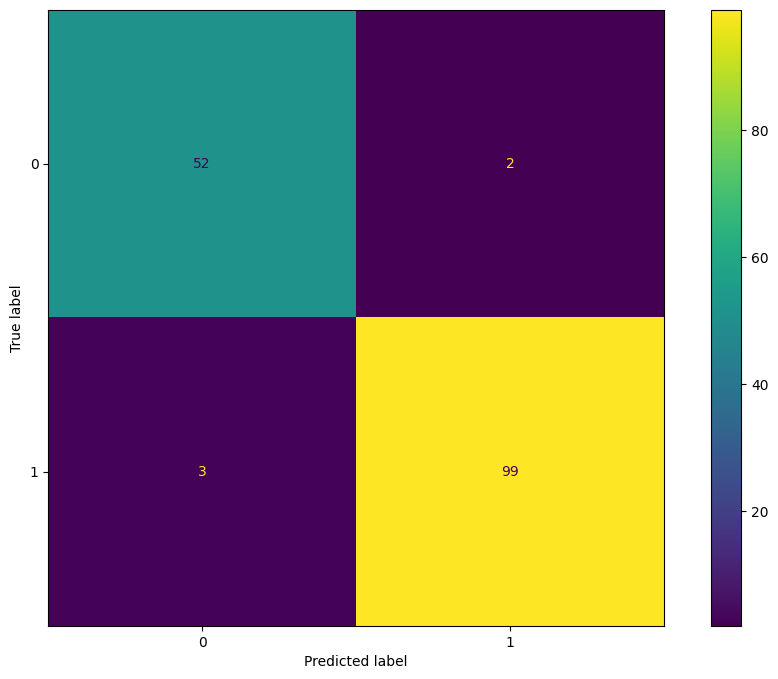

In [86]:
from sklearn.tree import DecisionTreeClassifier
# create a regressor object
regressorDT = DecisionTreeClassifier()

regressorDT.fit(x_train, y_train)

y_pred_DT = regressorDT.predict(x_test)


accuracyDT = accuracy_score(y_test, y_pred_DT)
print("Accuracy:", accuracyDT)
F1_score_dt=f1_score(y_test,y_pred_DT)
print("F1:", F1_score_dt)
precisionDT = precision_score(y_test, y_pred_DT)
print('Precision:', precisionDT)

recallDT = recall_score(y_test, y_pred_DT)
print('Recall:', recallDT)

cm = confusion_matrix(y_test, y_pred_DT, labels=regressorDT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regressorDT.classes_)

disp.plot()
plt.show()

AccuracyKNN: 0.9358974358974359
F1: 0.9494949494949494
Precision: 0.9791666666666666
Recall: 0.9215686274509803


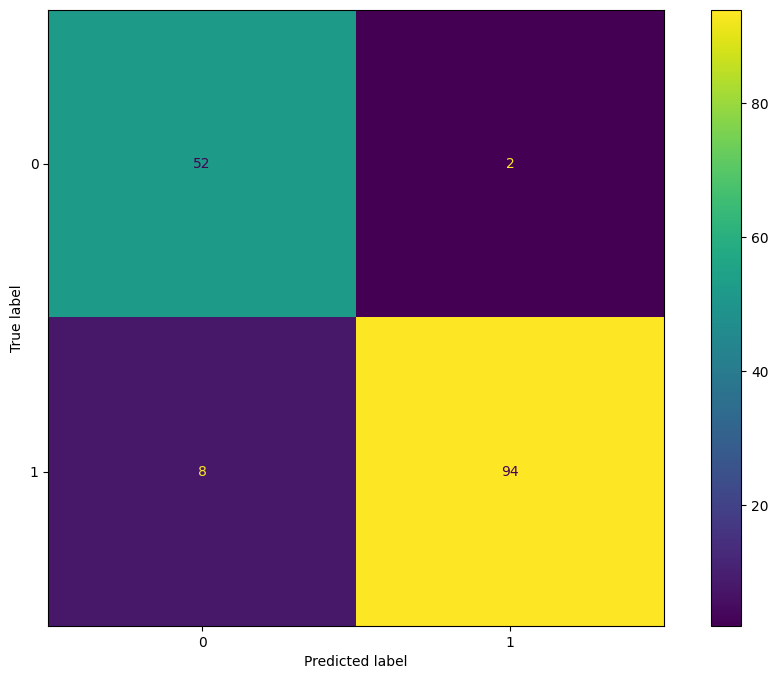

In [87]:
# Applying KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

accuracyKNN = accuracy_score(y_test, y_pred_knn)
print("AccuracyKNN:", accuracyKNN)
F1_score_KNN=f1_score(y_test,y_pred_knn)
print("F1:", F1_score_KNN)
precisionKNN = precision_score(y_test, y_pred_knn)
print('Precision:', precisionKNN)

recallKNN = recall_score(y_test, y_pred_knn)
print('Recall:', recallKNN)

cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot()
plt.show()

AccuracyRandomForest: 0.9871794871794872
F1: 0.99009900990099
PrecisionRandomForest: 1.0
RecallRandomForest: 0.9803921568627451


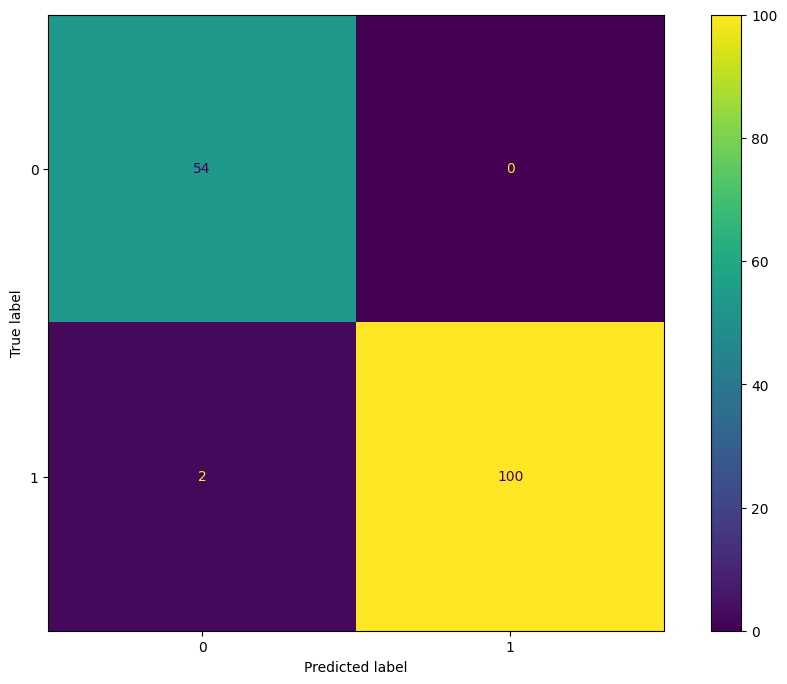

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are your training and testing data

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(x_test)

# Calculate and print performance metrics
accuracyRF = accuracy_score(y_test, y_pred_rf)
print("AccuracyRandomForest:", accuracyRF)

F1_score_RF=f1_score(y_test,y_pred_rf)
print("F1:", F1_score_RF)

precisionRF = precision_score(y_test, y_pred_rf)
print('PrecisionRandomForest:', precisionRF)

recallRF = recall_score(y_test, y_pred_rf)
print('RecallRandomForest:', recallRF)

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=random_forest.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest.classes_)

disp_rf.plot()
plt.show()


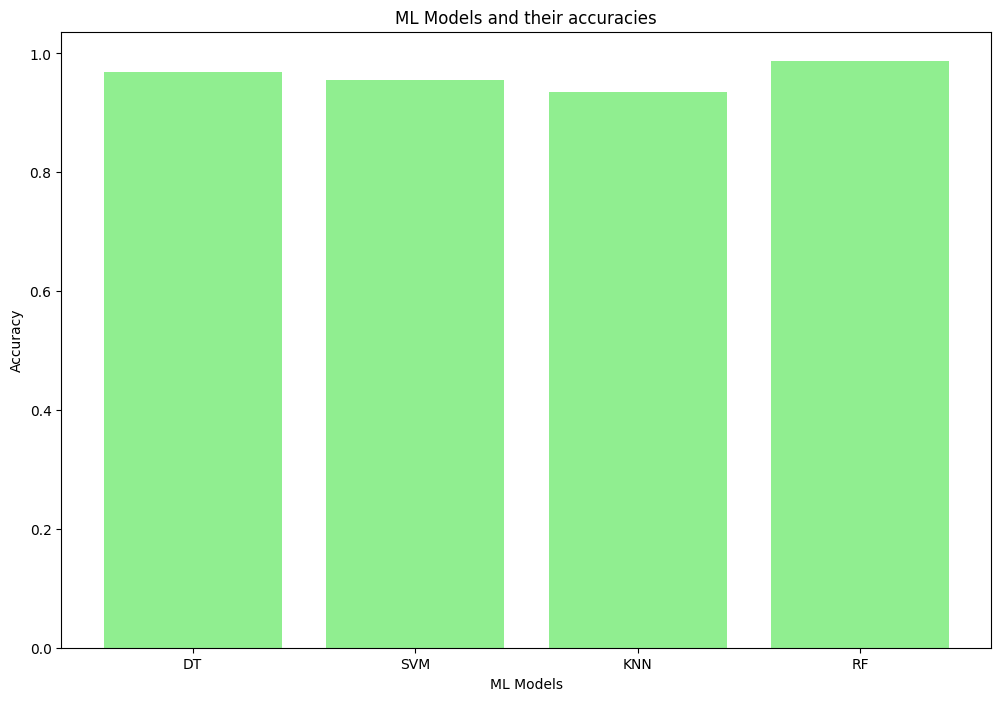

In [89]:
# plotting accuracy

import matplotlib.pyplot as plt

left = [1, 2, 3,4,]

tick_label = [ 'DT', 'SVM', 'KNN',"RF"]

height = [ accuracyDT , accuracySVM , accuracyKNN, accuracyRF]

score_list = ["accuracy", "precision", "recall","f1"]

# plotting a bar chart, scoring_list = score_list,
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = 'lightgreen')

# naming the x-axis
plt.xlabel('ML Models')
# naming the y-axis
plt.ylabel('Accuracy')
# plot title
plt.title('ML Models and their accuracies')

# function to show the plot
plt.show()

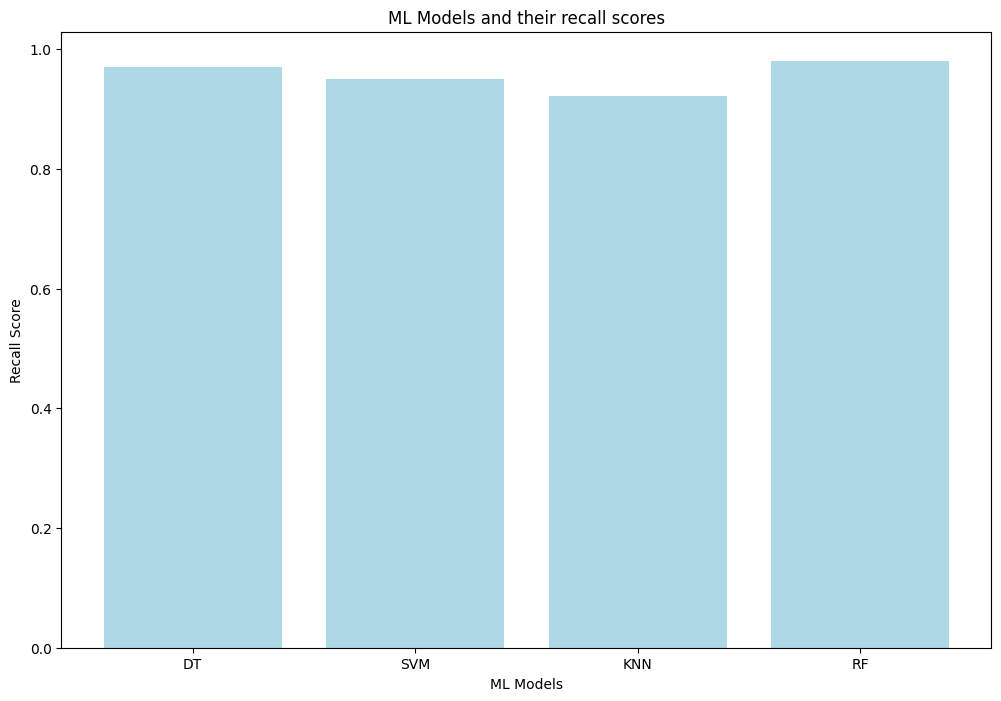

In [90]:
# plotting recall

import matplotlib.pyplot as plt

left = [1, 2, 3,4]

tick_label = ['DT', 'SVM', 'KNN',"RF"]

height = [recallDT , recallSVM, recallKNN, recallRF ]

score_list = ["accuracy", "precision", "recall","f1"]

# plotting a bar chart, scoring_list = score_list,
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = 'lightblue')

# naming the x-axis
plt.xlabel('ML Models')
# naming the y-axis
plt.ylabel('Recall Score')
# plot title
plt.title('ML Models and their recall scores')

# function to show the plot
plt.show()

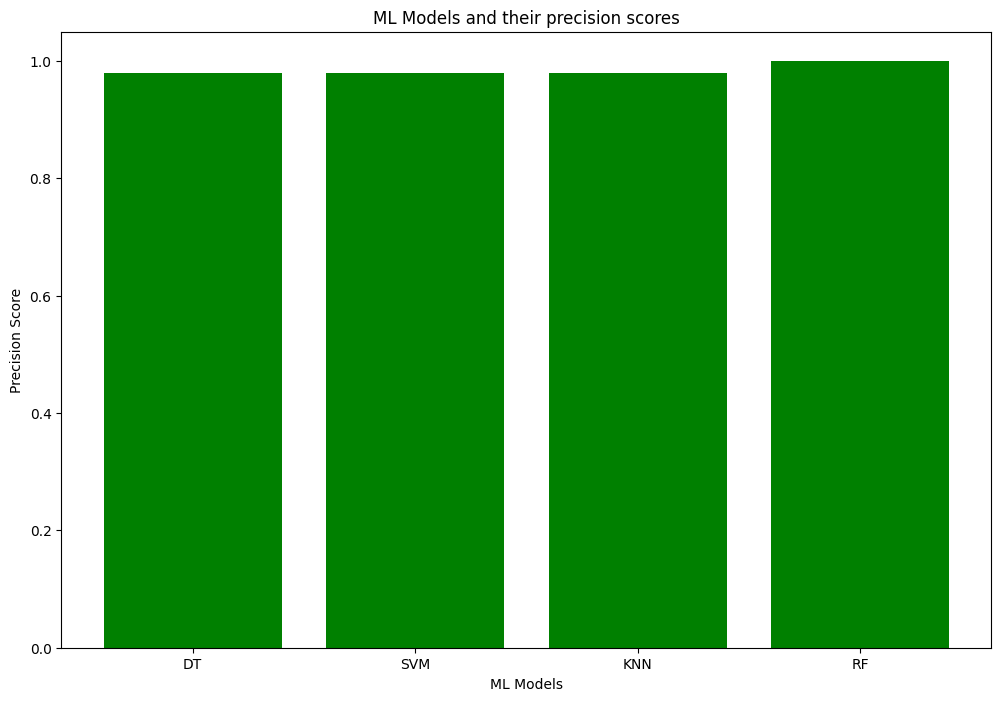

In [91]:
# plotting Precision

import matplotlib.pyplot as plt

left = [1, 2, 3,4]

tick_label = ['DT', 'SVM','KNN',"RF"]

height = [precisionDT , precisionSVM,  precisionKNN, precisionRF]

score_list = ["accuracy", "precision", "recall","f1"]

# plotting a bar chart, scoring_list = score_list,
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = 'green')

# naming the x-axis
plt.xlabel('ML Models')
# naming the y-axis
plt.ylabel('Precision Score')
# plot title
plt.title('ML Models and their precision scores')

# function to show the plot
plt.show()

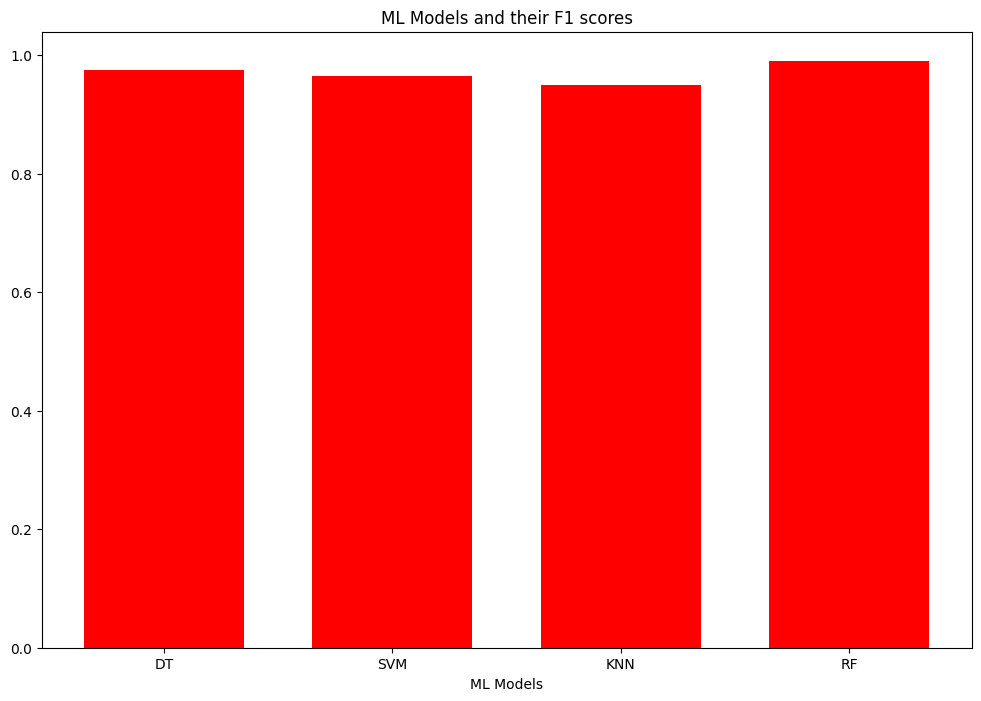

In [92]:
# plotting Precision

import matplotlib.pyplot as plt

left = [1, 2, 3,4]

tick_label = ['DT', 'SVM','KNN',"RF"]

height = [F1_score_dt,F1_score_svm,F1_score_KNN,F1_score_RF]

score_list = ["accuracy", "precision", "recall","f1"]

# plotting a bar chart, scoring_list = score_list,
plt.bar(left, height, tick_label = tick_label,
        width = 0.7, color = 'red')

# naming the x-axis
plt.xlabel('ML Models')
# naming the y-axis

# plot title
plt.title('ML Models and their F1 scores')

# function to show the plot
plt.show()